<a href="https://colab.research.google.com/github/sweetykitty777/Computer-Vision/blob/main/Ex1_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

You can download CIFAR10 dataset from official site: https://www.cs.toronto.edu/~kriz/cifar.html

or do it using Pytorch:
https://pytorch.org/vision/stable/datasets.html#cifar

or another framework.



In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

Files already downloaded and verified
Files already downloaded and verified


## Split data into train and validation parts

Extract subset containing train and validation parts.
Part must contain 5000 and 500 samples respectively.

In [ ]:
train_data, train_labels = trainset.data[:5000], np.array(trainset.targets[:5000])
val_data, val_labels = trainset.data[5000:5500], np.array(trainset.targets[5000:5500])

train_data = train_data.reshape(5000, -1)
val_data = val_data.reshape(500, -1)

## Dispaly some images  along with it class names
  


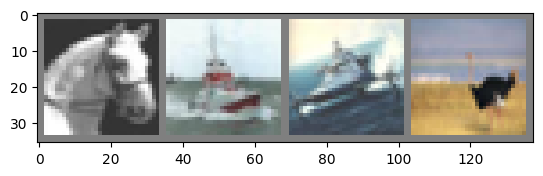

Лошадь Корабль Корабль Птица


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
data = next(dataiter)
images, labels = data[0], data[1]
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Implement NearestNeighbor class

In [ ]:
class NearestNeighbor:
  def __init__(self):
    pass

  def fit(self,x,y):
    self.x = x
    self.y = y

  def predict(self,x):
    num_test = x.shape[0]
    labels = np.zeros(num_test, dtype=self.y.dtype)

    for i in range(num_test):
      distances = np.sum(np.abs(self.x - x[i,:]), axis=1)
      min_index = np.argmin(distances)
      labels[i] = self.y[min_index]

    return labels

##Perform smoke test

- Create model instance
- get predictions for dozen of samples


In [ ]:
nn = NearestNeighbor()
nn.fit(train_data, train_labels)

predictions = nn.predict(val_data[:10])

for i, prediction in enumerate(predictions):
    print(prediction, "vs", val_labels[i])

2 vs 6
6 vs 7
0 vs 9
2 vs 0
3 vs 5
2 vs 2
2 vs 3
4 vs 3
4 vs 3
7 vs 9


# Validate your model

## Create validation function

Must calculate Accuracy metric for your model.

In [ ]:
def validate(model,x, y):
  """
      Arguments:
          model (Object): instance of NearestNeighbor class
          x (Tensor or numpy.array): collection of objects
          y (Tensor or numpy.array): collection of integer representing
          class numbers for objects from x

      Returns:
          accuracy (float) : percentage of correctly classified objects
    """
  predictions = model.predict(x)
  accuracy = np.mean(predictions == y)
  return accuracy

 ## Calculate model accuracy on validation data

In [ ]:
accuracy = validate(nn, val_data, val_labels)
print ("Accuracy {:.3f}".format(accuracy))

Accuracy 0.210


# Place for brief conclusion
Well, I have done some extra work below, so I found out that manhattan distance with 1 neighbour fits the task better than other types of algorithms but it is also very bad (worse than people)


### Extra work is here: ###

In [ ]:
import numpy as np

class KNearestNeighbor:
    def __init__(self, k, distance_fn):
        self.k = k
        self.distance_fn = distance_fn

    def fit(self, x, y):
        self.x_train = x
        self.y_train = y

    def predict(self, x):
        labels = []
        for i in range(len(x)):
            dists = self.distance_fn(self.x_train, x[i, :])
            knn = np.argsort(dists)[:self.k]
            labels_knn = self.y_train[knn]
            label, count = np.unique(labels_knn, return_counts=True)
            labels.append(label[np.argmax(count)])
        return np.array(labels)

In [ ]:
def euclidean_distance(x_train, x_test):
    return np.sqrt(np.sum((x_train - x_test)**2, axis=1))

def manhattan_distance(x_train, x_test):
    return np.sum(np.abs(x_train - x_test), axis=1)

def chebyshev_distance(x_train, x_test):
    return np.max(np.abs(x_train - x_test), axis=1)

In [ ]:
for distance_fn in [euclidean_distance, manhattan_distance, chebyshev_distance]:
    for k in [1, 3, 5, 7]:
      knn = KNearestNeighbor(k=k, distance_fn=distance_fn)
      knn.fit(train_data, train_labels)
      preds = knn.predict(val_data)
      accuracy = np.mean(preds == val_labels)
      print(f"Accuracy with {distance_fn.__name__}, {k} neighbors: {accuracy}")

Accuracy with euclidean_distance, 1 neighbors: 0.186
Accuracy with euclidean_distance, 3 neighbors: 0.182
Accuracy with euclidean_distance, 5 neighbors: 0.194
Accuracy with euclidean_distance, 7 neighbors: 0.18
Accuracy with manhattan_distance, 1 neighbors: 0.21
Accuracy with manhattan_distance, 3 neighbors: 0.172
Accuracy with manhattan_distance, 5 neighbors: 0.196
Accuracy with manhattan_distance, 7 neighbors: 0.192
Accuracy with chebyshev_distance, 1 neighbors: 0.086
Accuracy with chebyshev_distance, 3 neighbors: 0.09
Accuracy with chebyshev_distance, 5 neighbors: 0.086
Accuracy with chebyshev_distance, 7 neighbors: 0.078


In [ ]:
for distance_fn in [euclidean_distance, manhattan_distance, chebyshev_distance]:
    for k in [12, 17, 21]:
      knn = KNearestNeighbor(k=k, distance_fn=distance_fn)
      knn.fit(train_data, train_labels)
      preds = knn.predict(val_data)
      accuracy = np.mean(preds == val_labels)
      print(f"Accuracy with {distance_fn.__name__}, {k} neighbors: {accuracy}")

Accuracy with euclidean_distance, 12 neighbors: 0.176
Accuracy with euclidean_distance, 17 neighbors: 0.172
Accuracy with euclidean_distance, 21 neighbors: 0.164
Accuracy with manhattan_distance, 12 neighbors: 0.186
Accuracy with manhattan_distance, 17 neighbors: 0.178
Accuracy with manhattan_distance, 21 neighbors: 0.184
Accuracy with chebyshev_distance, 12 neighbors: 0.082
Accuracy with chebyshev_distance, 17 neighbors: 0.08
Accuracy with chebyshev_distance, 21 neighbors: 0.08


# Ideas for extra work

- Implenment K-NearestNeighbor
- Test different distance functions
- Find hyperparams using Cross-Validation
- Plot accuracy curve against K
- Evaluate time  